In [14]:
import pickle
from deap import tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [28]:
enemy_id = 1
runs = 10

In [83]:
logbooks_b = []
logbooks_r = []

for run in range(runs):

    with open(f'logBook/biased/enemy_{enemy_id}/logBook_run_{run}.pkl', 'rb') as f:
        logBook = pickle.load(f)

    logBook = pd.DataFrame.from_dict(logBook)
    logBook['run'] = f'{run}'

    logbooks_b.extend([logBook])

    with open(f'logBook/random/enemy_{enemy_id}/logBook_run_{run}.pkl', 'rb') as f:
        logBook = pickle.load(f)

    logBook = pd.DataFrame.from_dict(logBook)
    logBook['run'] = f'{run}'

    logbooks_r.extend([logBook])

logbook_biased = pd.concat(logbooks_b)
logbook_random = pd.concat(logbooks_r)

In [84]:
logbook_biased.describe()

,gen,mean,std,max
count,500.000000,500.000000,500.000000,500.000000
mean,24.500000,52.206566,25.883183,78.507734
std,14.445322,17.051553,4.642501,11.070036
min,0.000000,-0.441611,9.832957,30.244258
25%,12.000000,44.144029,23.576758,75.058516
50%,24.500000,54.444942,25.938071,75.732142
75%,37.000000,62.860858,28.359834,89.792124
max,49.000000,81.616354,39.378046,94.054579


In [85]:
logbook_random.describe()

,gen,mean,std,max
count,500.000000,500.000000,500.000000,500.000000
mean,24.500000,60.643933,28.184969,84.440450
std,14.445322,19.303389,4.547487,11.784320
min,0.000000,-0.627271,9.859645,57.162270
25%,12.000000,47.705381,25.697114,75.059829
50%,24.500000,63.241540,28.113889,93.742865
75%,37.000000,77.663359,31.287163,94.023266
max,49.000000,86.632301,40.468603,94.023266


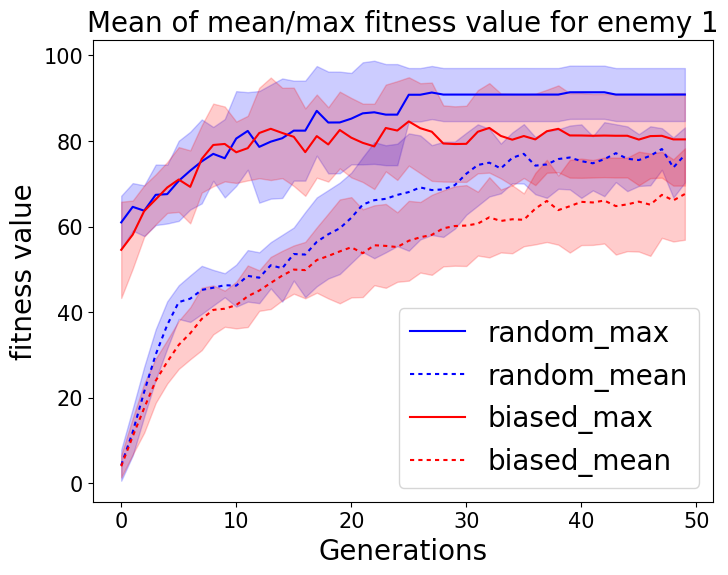

In [89]:
plt.rcParams['figure.figsize'] = (8, 6)

enemy_1_plot = sns.lineplot(data=logbook_random, x='gen', y='max', errorbar='sd', \
    color='b', label='random_max')
enemy_1_plot = sns.lineplot(data=logbook_random, x='gen', y='mean', errorbar='sd', \
    color='b', label='random_mean', dashes=[2,2], err_style='band')
enemy_1_plot = sns.lineplot(data=logbook_biased, x='gen', y='max', errorbar='sd', \
    color='r', label='biased_max')
enemy_1_plot = sns.lineplot(data=logbook_biased, x='gen', y='mean', errorbar='sd', \
    color='r', label='biased_mean', dashes=[2,2], err_style='band')

enemy_1_plot.set_xlabel('Generations', fontsize=20)
enemy_1_plot.set_ylabel('fitness value', fontsize=20)
enemy_1_plot.axes.set_title('Mean of mean/max fitness value for enemy 1', fontsize=20)
enemy_1_plot.tick_params(labelsize=15)
plt.legend(fontsize=20, loc='lower right')

fig_1 = enemy_1_plot.get_figure()
fig_1.savefig('lineplot_figures/enemy_1_mean.svg', bbox_inches='tight')
